In [27]:
from utilities import * 
import GetTranscription

In [29]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

In [30]:
clips =fcs.get_audio_files(libri_train)
len(clips)

28539

28539
120
ONCE OR TWICE MARGARET FOUND HERSELF MECHANICALLY COUNTING THE REPETITION OF THE MONOTONOUS SOUND WHILE SHE WONDERED IF SHE MIGHT VENTURE TO PUT A QUESTION ON A SUBJECT VERY NEAR TO HER HEART AND ASK WHERE FREDERICK WAS NOW
(173400,)


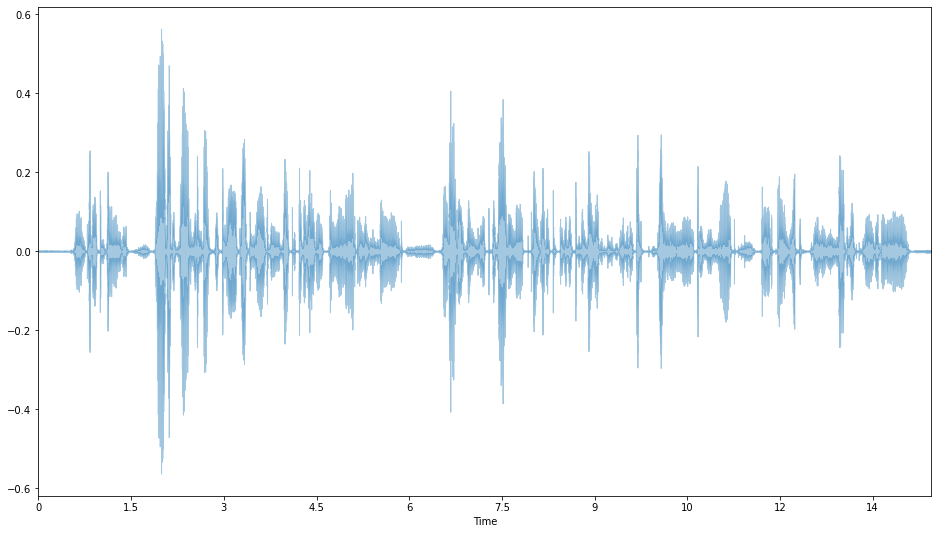

In [31]:
plt.figure(figsize=(16,9))
sr = 12000
hop_length = int(sr/100)
frame_length = int(hop_length*2)
clips = fcs.get_audio_files(libri_train)
clip = clips[6701]
audio, sr = librosa.load(clip, sr=sr)
print(len(clips))
print(hop_length)
print(GetTranscription.get_file_transcript(clip))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio, rate=sr)

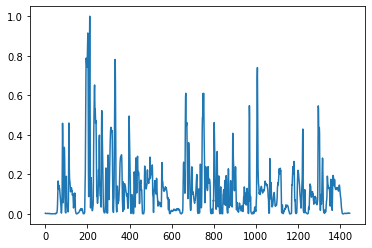

In [36]:
f = librosa.feature.rms(audio,hop_length=hop_length, frame_length= frame_length).flatten()
rmse_diff = np.zeros_like(f)
rmse_diff[1:] = np.diff(f)
#librosa.display.waveplot(rmse_diff)
#print(rmse_diff[0:150])
plt.plot(normalize(f))

In [66]:
audio.shape
#n.shape
hop_length

120

In [89]:
start, end = 0 , 0
voiced = []
n = normalize(f)
t = 0.05
for x in range(len(n)):
    if n[x] > t:
        if start == 0:
            start = x
        if start != 0 and x< len(n):
            if n[x+1] < t and start !=x:
                end = x
                voiced.append([start,end])
                start,end = 0  ,0                

In [92]:
len(voiced)

61

In [102]:
x = voiced[18]
start, end =int(x[0]*hop_length ), int(x[1]*hop_length)
ipd.Audio(audio[start:end],rate=sr)

In [6]:
start,end = 0, hop_length
test =[]
while end < len(audio):
    test.append([start,end,np.nanmean(librosa.pcen(audio[start:end]))])
    start+=20
    end+=20
test =np.array(test)    

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


In [18]:
energy = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), hop_length)
])
energy.shape

(1445,)

In [8]:
#test =np.array(test)
#plt.plot( test[:,1],test[:,2])
test[:,2].shape


#audio.shape

(15884,)

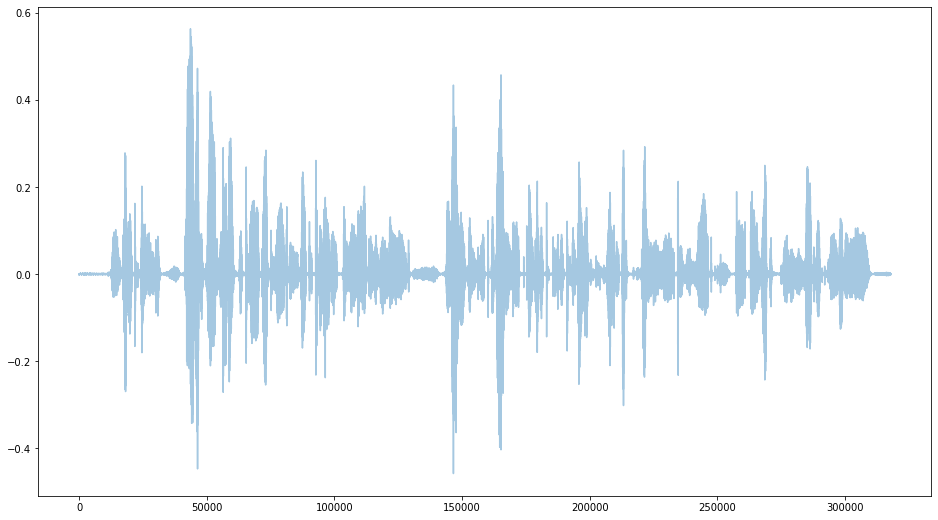

In [9]:
plt.figure(figsize=(16,9))
#plt.plot(range(0,len(test)), normalize(test[:,2]) )
plt.plot(audio,alpha=0.4)
#plt.plot(normalize(audio),alpha=0.4)
plt.show()

In [10]:
librosa.feature.rms(audio,hop_length=hop_length)[0].shape

(1446,)

NameError: name 'three' is not defined

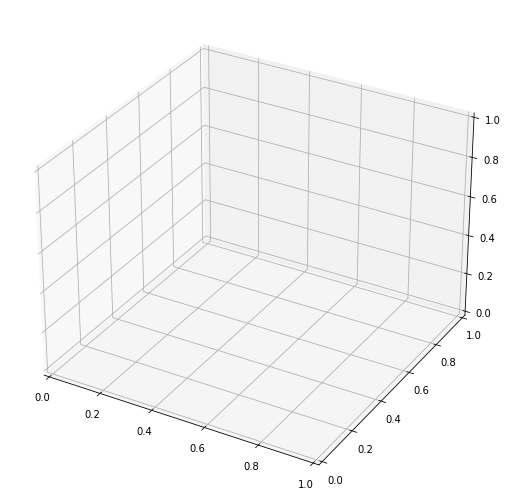

In [11]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[:,1],three[:,0],three[:,2])

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=3)
labels = model.fit_predict(three)
print(labels)

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[labels==0,0], three[labels==0,1],three[labels==0,2], c='b')
plt.scatter(three[labels==1,0], three[labels==1,1],three[labels==1,2], c='r')
plt.scatter(three[labels==2,0], three[labels==2,1],three[labels==2,2], c='g')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

In [ ]:
x= EM.predict(three)

In [ ]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[x==0,0], three[x==0,1], three[x==0,2], c='r')
plt.scatter(three[x==1,0], three[x==1,1], three[x==1,2], c='b')
plt.scatter(three[x==2,0], three[x==2,1],  three[x==2,2],c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Silence', 'Voiced', 'Unvoiced'))

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[x==0,0], three[x==0,1],three[x==0,2], c='r')
plt.scatter(three[x==1,0], three[x==1,1],three[x==1,2], c='b')
plt.scatter(three[x==2,0], three[x==2,1],three[x==2,2], c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

In [ ]:
normalize(three[:,1])
np.argmax(three[:,0])
np.set_printoptions(formatter={'int': lambda x: "{0:0.3f}".format(x)})
print(three[:,0])

In [ ]:
print(len(x))
print(x)
x[0:150]

In [ ]:
plt.figure(figsize=(21,9))
#raudio= librosa.resample(y=audio, orig_sr=sr, target_sr=100)
for s in range(len(x)):
    if x[s]==2:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='r', alpha=0.3)
    if x[s]==1:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='y', alpha=0.3)
    if x[s]==0:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='g', alpha=0.3)
plt.plot(audio, alpha=0.3)



In [ ]:
librosa.effects.split(audio, top_db=,  frame_length=2048, hop_length=220)

In [ ]:
audio.shape

0.99999994


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


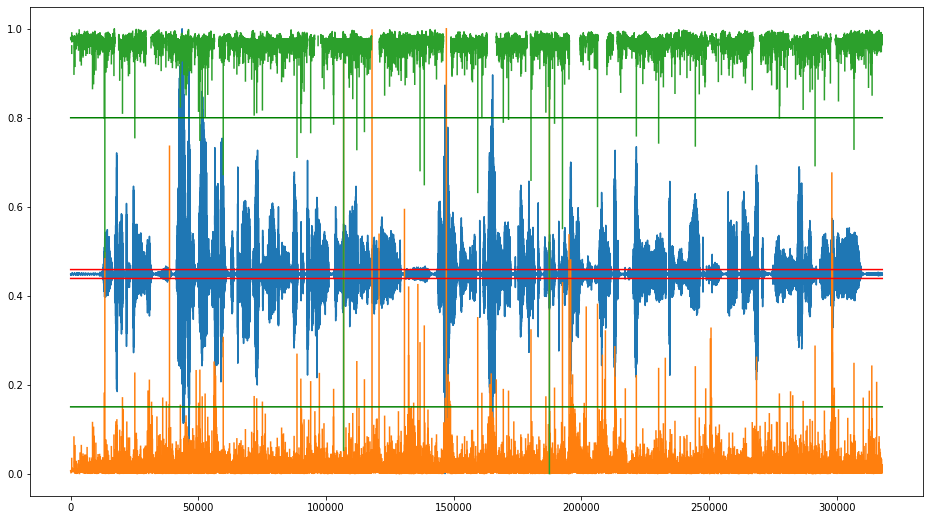

In [8]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(audio, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(audio),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(audio),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(audio),0.8)
y3 = np.full(len(audio),0.15)
energy = librosa.pcen(audio)
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(audio, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(energy, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




1446
[[ 0.00349376 -0.00018722]
 [ 0.00230426 -0.00018722]
 [ 0.00222004 -0.00018722]
 ...
 [ 0.00385304 -0.00015717]
 [ 0.00356661 -0.00015717]
 [ 0.0032819  -0.00015717]]


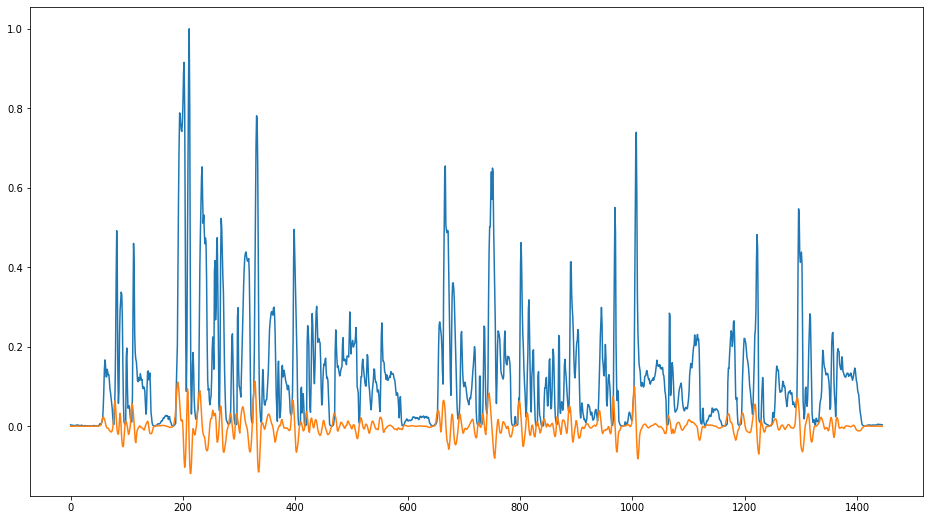

In [6]:
import energy_split
splits =energy_split.energies(audio,hop_length, frame_length)
print(len(splits))

print(splits)
plt.figure(figsize=(16,9))
plt.plot(splits)

In [ ]:
plt.figure(figsize=(16,9))
energy = librosa.pcen(audio[19800:27060])
#plt.plot(audio) #-0.4-0.6
plt.plot(normalize(energy))
plt.plot(normalize(audio[19800:27060]))

for x in split_by_energy(audio[19800:27060]):
    plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='g')
for x in energy:
    if math.sqrt(x**2)<0.02:
        plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='r')
plt.show()

In [ ]:
def split_by_energy(audio):
    frames = len(audio)
    # energy per frame
    energy = librosa.pcen(audio)
    # rate of change of energy
    delta_energy = librosa.feature.delta(energy)
    # rate of change of change of energy
    delta_energy2 = librosa.feature.delta(delta_energy)

    s_audio = sklearn.preprocessing.minmax_scale(audio, axis=0)
    s_energy = sklearn.preprocessing.minmax_scale(energy, axis=0)
    s_d_energy = sklearn.preprocessing.minmax_scale(delta_energy, axis=0)
    s_d_2_energy = sklearn.preprocessing.minmax_scale(delta_energy2, axis=0)

    audio_range = np.max(s_audio) - np.min(s_audio)
    print(audio_range)
    mean = np.mean(s_audio)

    #print("scaled delta energy less than 0.5 ", np.count_nonzero( s_d_energy<0.8))
    #print("scaled audio less than 0.5 ", np.count_nonzero(0.45 >s_audio or s_audio> 0.55))

    out = []
    # blue audio
    # yellow energy
    # green de1
    # red de2
    for x in range(frames):
        if s_audio[x] > (mean+0.01) or s_audio[x] < (mean-0.01):
            if s_d_energy[x] < 0.8:
                out.append(x)
    return out


# In[184]:
splits = split_by_energy(audio[19800:27060])
print(len(splits))
print(splits)

In [ ]:
energy = normalize(librosa.pcen(audio))
delta_energy = normalize(librosa.feature.delta(energy))
delta_energy2 =normalize(librosa.feature.delta(delta_energy))

plt.figure(figsize=(16,9))
plt.plot(audio[:]) #-0.4-0.6
plt.plot(energy) #-0.4-0.6
plt.plot(delta_energy[:]) #0- -30
plt.plot(delta_energy2[:]) #0-2 
plt.show()

print(energy)
print (delta_energy)
#print (min(energy))

In [9]:
stft = librosa.stft(e[1781:4638], hop_length=220)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

NameError: name 'e' is not defined

In [ ]:
x = audio 
spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr, hop_length=220)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, hop_length=220)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3,  hop_length=220)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4,  hop_length=220)[0]
#spectral_bandwidth_5 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=5, hop_length=220)[0]
#spectral_bandwidth_6 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=6, hop_length=220)[0]
plt.figure(figsize=(15, 12))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
#plt.plot(t, normalize(spectral_bandwidth_5), color='b')
#plt.plot(t, normalize(spectral_bandwidth_6), color='pink')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
from joblib import dump, load

In [ ]:
dump(EM, 'silenceVoiceClusterEM.joblib') 

In [ ]:
EM = load('EM2000spherical_hopLength40.joblib') 

In [ ]:
a_file= open("test.txt","w")
np.savetxt(a_file, three)
a_file.close()